In [2]:
%matplotlib inline
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy
from scipy.ndimage import gaussian_filter1d as gf1d
from scipy.ndimage import gaussian_filter as gf
from scipy.ndimage import uniform_filter as uf
import sys
#sys.path.append(directory+":\\Chris\\code\\DDM\\")
import tiff_file
import ddm_clean as ddm

import io 
import sys
import csv
import os
import glob #glob is helpful for searching for filenames or directories
import pickle #for saving data

## Image autocorrelation function defined below

In [3]:
def im_corr(image, filter=False, filtersize=80):
    '''
    Computes image autocorrelation. 
    Takes as input:
        image: 2D image
        filter: Boolean, if true will filter image with uniform filter
        filtersize: size for uniform filtering
        
    Returns:
        corr_im: the image autocorrelation (this will be same size as image)
        rav_corr: radially averaged image autocorrelation
    '''
    
    if filter:
        image = image*1.0 - uf(image,filtersize)
    image = 1.0*image-image.mean() #subtract mean
    image = image/image.std() #normalize by standard deviation
    corr_im = abs(fftshift(ifft2(fft2(image)*np.conj(fft2(image)))))/(image.shape[0]*image.shape[1])
    
    #radial average taken
    rav_corr = ddm.newRadav(corr_im)
    
    
    return corr_im, rav_corr

def filtimage(image, filtersize=80):
    image = image*1.0 - uf(image,filtersize)
    return image

def last_3chars(x):
    return((x.split('\\')[-1])[-7:-4])
#last_3chars(files[0])

In [4]:
###################################################################################
# Specify where the data is and file name for image (or image sequence)           #
###################################################################################

directory = "Z"
exp = "8-19-21 kai beads"
data_dir = directory+":\\Gregor L\\__Kai Colloids\\"+exp+"\\raw tiffs\\"
plot_saveto= directory+":\\Gregor L\\__Kai Colloids\\SIA\\Data\\"+exp
kaiC = "AE"

files = glob.glob(data_dir+"*"+kaiC+"*"+"*.tif")
files = sorted(files, key = last_3chars)
print("found %i files" % len(files))
for i,f in enumerate(files): print (' %i \t %s' % (i, f.split('\\')[-1]))

found 24 files
 0 	 AE_2-42_004.tif
 1 	 AE_2-42_005.tif
 2 	 AE_2-42_006.tif
 3 	 AE_5-14_013.tif
 4 	 AE_5-14_014.tif
 5 	 AE_5-14_015.tif
 6 	 AE_8-22_023.tif
 7 	 AE_8-22_024.tif
 8 	 AE_8-22_025.tif
 9 	 AE_1-52_033.tif
 10 	 AE_1-52_034.tif
 11 	 AE_1-52_035.tif
 12 	 AE_8-48_042.tif
 13 	 AE_8-48_043.tif
 14 	 AE_8-48_044.tif
 15 	 AE_10-53_051.tif
 16 	 AE_10-53_052.tif
 17 	 AE_10-53_053.tif
 18 	 AE_2-48_060.tif
 19 	 AE_2-48_061.tif
 20 	 AE_2-48_062.tif
 21 	 AE_days later_3-08_104.tif
 22 	 AE_days later_3-08_105.tif
 23 	 AE_days later_3-08_106.tif


In [5]:
found_file_number = 0
full_filename = files[found_file_number]
data_file = (full_filename.split('\\')[-1])[:-4] #[30:-38]
print(data_file)
print(full_filename)

im_array = [[0.0]*10] * len(files)
avg_im_array = [0.0] * len(files)
corr_im_array = [[0.0]*len(files)] * 10    #corr_im_array = [[0.0]*10] * len(files)
corr_rad_array = [[0.0]*len(files)] * 10   #corr_rad_array = [[0.0]*10] * len(files)
avg_corr_rad_array = [0.0] * len(files)

im_array1 = [0.0] * len(files)
im_array2 = [0.0] * len(files)
im_array3= [0.0] * len(files)
im_array4 = [0.0] * len(files)
im_array5 = [0.0] * len(files)
im_array6= [0.0] * len(files)
im_array7 = [0.0] * len(files)
im_array8 = [0.0] * len(files)
im_array9= [0.0] * len(files)

corr_im_array1 = [0.0] * len(files)
corr_im_array2 = [0.0] * len(files)
corr_im_array3 = [0.0] * len(files)
corr_im_array4 = [0.0] * len(files)
corr_im_array5 = [0.0] * len(files)
corr_im_array6 = [0.0] * len(files)
corr_im_array7 = [0.0] * len(files)
corr_im_array8 = [0.0] * len(files)
corr_im_array9 = [0.0] * len(files)

corr_rad_array1 = [0.0] * len(files)
corr_rad_array2 = [0.0] * len(files)
corr_rad_array3 = [0.0] * len(files)

print(len(files))

area1_files = files[0::3]
area2_files = files[1::3]
area3_files = files[2::3]
area_files_length = int(len(files)/3) 
#print(area3_files)
print(area_files_length)
#print(corr_rad_even)

print(im_array[0][0])

AE_2-42_004
Z:\Gregor L\__Kai Colloids\8-19-21 kai beads\raw tiffs\AE_2-42_004.tif
24
8
0.0


In [6]:
results_dict = {'area 1' : [],
                'area 2' : [],
                'area 3' : [],}
area1_dict = {}
area2_dict = {}
area3_dict = {}

In [7]:
full_filename = area1_files[0]
data_file = (full_filename.split('\\')[-1])[:-4]
print(data_file)
print(len(data_file))
im_arrayyy = tiff_file.imread(data_dir+data_file+".tif",key=0)
print(len(im_arrayyy))

AE_2-42_004
11
256


In [8]:
#Load one frame from all area 1 files
#The 'key' parameter (defined by "frame_num") specifies which frame to load
frame_num = [0]
for i in range(area_files_length): #len(files)):
    full_filename = area1_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    im_array1[i] = tiff_file.imread(data_dir+data_file+".tif",key=frame_num)
    im_array2[i] = tiff_file.imread(data_dir+data_file+".tif",key=1000)
    im_array3[i] = tiff_file.imread(data_dir+data_file+".tif",key=2000)

KeyboardInterrupt: 

In [9]:
#Load one frame from all area 1 files
#The 'key' parameter (defined by "frame_num") specifies which frame to load
#frame_num = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000]

for i in range(area_files_length): #len(files)):
    full_filename = area1_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    for count, frame_num in enumerate([0,1000,2000,3000,4000,5000,6000,7000,8000]):
        im_array[i][count] = tiff_file.imread(data_dir+data_file+".tif",key=frame_num)
    avg_im_array[i] = (im_array[i][0] + im_array[i][1] + im_array[i][2] + im_array[i][3] + im_array[i][4] + 
                        im_array[i][5] + im_array[i][6] + im_array[i][7] + im_array[i][8] + im_array[i][9])/10

In [11]:
print(im_array[0])

[array([[57718, 57550, 57986, ..., 58333, 58220, 58215],
       [57557, 57698, 57940, ..., 58599, 58517, 58460],
       [56867, 56401, 57221, ..., 57473, 57784, 58050],
       ...,
       [57160, 55508, 55441, ..., 59233, 59612, 60193],
       [55388, 54331, 54768, ..., 59138, 59400, 60555],
       [54717, 54450, 55345, ..., 58162, 58530, 59917]], dtype=uint16), array([[58683, 58799, 59632, ..., 57843, 57962, 57597],
       [57997, 58449, 58907, ..., 58311, 58627, 58999],
       [57178, 57505, 58551, ..., 58622, 58698, 58306],
       ...,
       [55581, 55970, 57009, ..., 59044, 57998, 56246],
       [55225, 55183, 55505, ..., 59514, 58601, 56890],
       [56290, 55632, 55316, ..., 59998, 58798, 58024]], dtype=uint16), array([[60468, 59424, 58620, ..., 60396, 59640, 59923],
       [59596, 58707, 57857, ..., 60110, 59221, 59489],
       [57452, 56580, 56982, ..., 59590, 58654, 58067],
       ...,
       [60980, 60065, 60044, ..., 58990, 58243, 57473],
       [60600, 59433, 58977, ..., 5

Shape of ims is 256,256


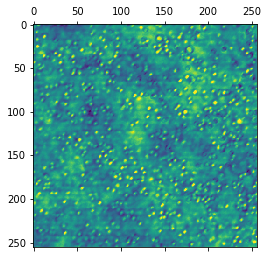

In [9]:
#preview the given frame of a selected area 1 file (defined by "select_file_num")

select_file_num = 1
print("Shape of ims is %i,%i" % im_array1[select_file_num].shape)
plt.matshow(im_array1[select_file_num])


Shape of ims is 256,256


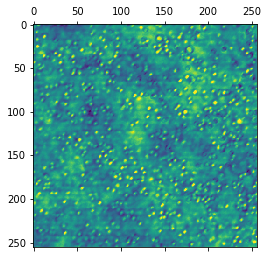

In [12]:
select_file_num = 1
print("Shape of ims is %i,%i" % avg_im_array[select_file_num].shape)
plt.matshow(im_array1[select_file_num])

<IPython.core.display.Javascript object>


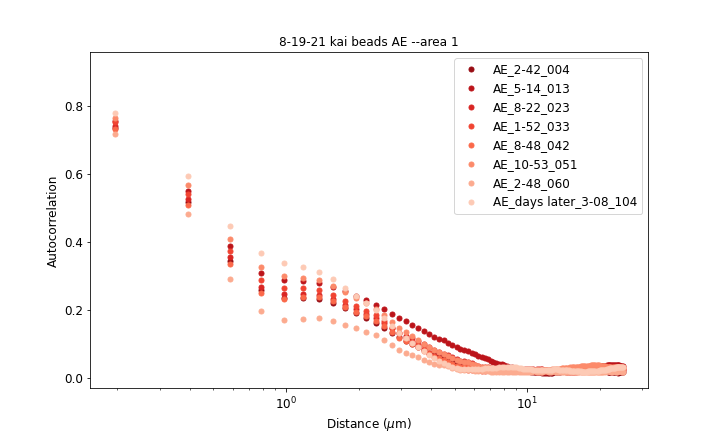

Text(0.5, 1.0, '8-19-21 kai beads AE --area 1')

In [44]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Reds')

fig, ax = plt.subplots(figsize=(10,10/1.618))

ax.tick_params(axis='both', which='major', labelsize=12)
markerSize = 10

for i in range(area_files_length):    
    full_filename = area1_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    corr_im_array1[i], corr_rad_array1[i] = im_corr(im_array1[i],filter=False,filtersize=50)
    corr_im_array2[i], corr_rad_array2[i] = im_corr(im_array2[i],filter=False,filtersize=50)
    corr_im_array3[i], corr_rad_array3[i] = im_corr(im_array3[i],filter=False,filtersize=50)
    xvalues = np.arange(len(corr_rad_array1[0]))*0.196 
    avg_corr_rad_array[i] = (corr_rad_array1[i] + corr_rad_array2[i] + corr_rad_array3[i])/3
    plt.semilogx(xvalues, gf1d(avg_corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.errorbar(x, y, yerr = y_error, fmt ='o')
    #plt.semilogx(xvalues, gf1d(corr_rad_array2[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.semilogx(xvalues, gf1d(corr_rad_array3[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.semilogy(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.loglog(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    area1_dict['x values'] = xvalues
    area1_dict[data_file] = gf1d(corr_rad_array[i],1)

results_dict['area 1'] = area1_dict
    
plt.xlabel("Distance ($\mu$m)",fontsize=12)
plt.ylabel("Autocorrelation",fontsize=12)
plt.legend(loc=0,fontsize=12)

#plt.xlim(0.14, 20)
plt.title(exp+" "+kaiC+" --area 1")
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

<IPython.core.display.Javascript object>


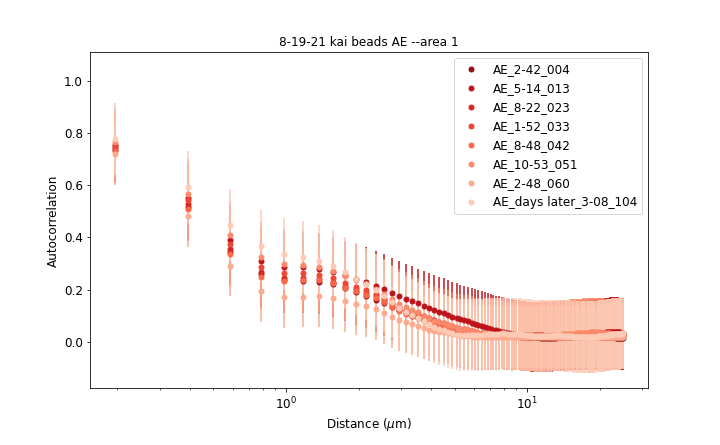

24
24
24
24
24
24
24
24


Text(0.5, 1.0, '8-19-21 kai beads AE --area 1')

<IPython.core.display.Javascript object>


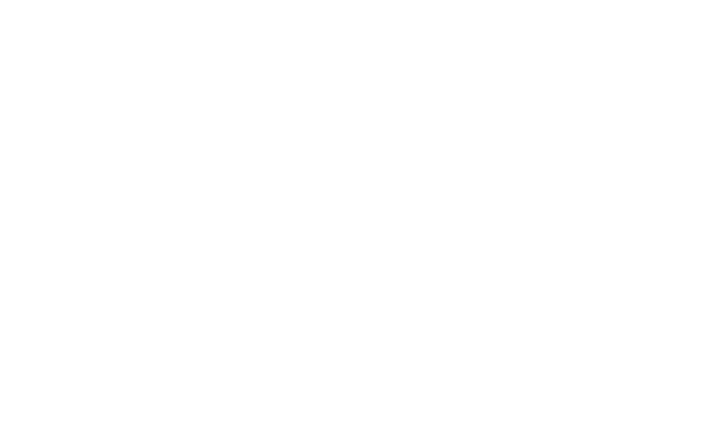

AttributeError: 'float' object has no attribute 'mean'

In [24]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Reds')

fig, ax = plt.subplots(figsize=(10,10/1.618))

ax.tick_params(axis='both', which='major', labelsize=12)
markerSize = 10

for i in range(area_files_length):    
    full_filename = area1_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    corr_im_array[i][0], corr_rad_array[i][0] = im_corr(im_array[i][0],filter=False,filtersize=50)
    #for j in range(10):
     #   corr_im_array[i][j], corr_rad_array[i][j] = im_corr(im_array[i][j],filter=False,filtersize=80)
        #avg_corr_rad_array[i] = avg_corr_rad_array[i] + corr_rad_array[i][j]
        #print(avg_corr_rad_array[i])
        #print('j')
    #print(avg_corr_rad_array[i])
    avg_corr_rad_array[i] = (corr_rad_array[i][0] + corr_rad_array[i][1] + corr_rad_array[i][2] + corr_rad_array[i][3] +
                            corr_rad_array[i][4] + corr_rad_array[i][5] + corr_rad_array[i][6] + corr_rad_array[i][7] +
                            corr_rad_array[i][8] + corr_rad_array[i][9])/10
    xvalues = np.arange(len(avg_corr_rad_array[0]))*0.196 
    plt.semilogx(xvalues, gf1d(corr_rad_array[i][0],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.semilogx(xvalues, gf1d(corr_rad_array[i][1],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.semilogx(xvalues, gf1d(corr_rad_array[i][2],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.semilogx(xvalues, gf1d(corr_rad_array[i][3],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.semilogx(xvalues, gf1d(corr_rad_array[i][4],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.semilogx(xvalues, gf1d(corr_rad_array[i][5],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.semilogx(xvalues, gf1d(avg_corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.semilogy(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.loglog(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    area1_dict['x values'] = xvalues
    area1_dict[data_file] = gf1d(avg_corr_rad_array[i],1)
    #print('i')

results_dict['area 1'] = area1_dict
    
plt.xlabel("Distance ($\mu$m)",fontsize=12)
plt.ylabel("Autocorrelation",fontsize=12)
plt.legend(loc=0,fontsize=12)

#plt.xlim(0.14, 20)
plt.title(exp+" "+kaiC+" --area 1")
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

<IPython.core.display.Javascript object>


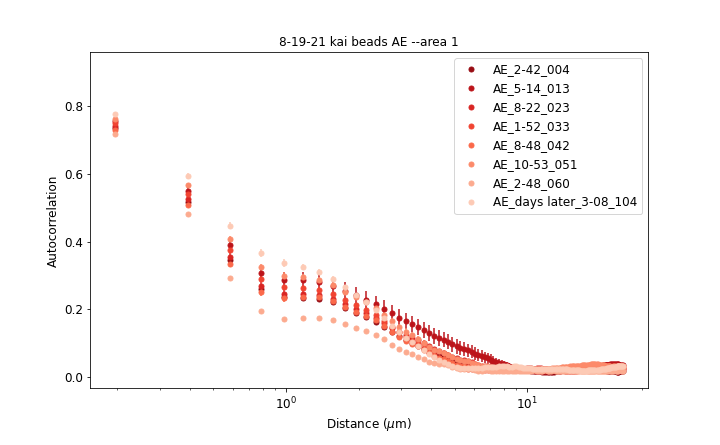

256


Text(0.5, 1.0, '8-19-21 kai beads AE --area 1')

In [36]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Reds')

fig, ax = plt.subplots(figsize=(10,10/1.618))

ax.tick_params(axis='both', which='major', labelsize=12)
markerSize = 10
y_error =  [[0.0] * 128] * len(files)
avg_corr_rad_array =  [[0.0] * 128] * len(files)
new_array = [0.0] * len(im_array1)
print(len(im_array1[0]))
#print(y_error[0][0])
for i in range(area_files_length):    
    full_filename = area1_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    corr_im_array1[i], corr_rad_array1[i] = im_corr(im_array1[i],filter=False,filtersize=50)
    corr_im_array2[i], corr_rad_array2[i] = im_corr(im_array2[i],filter=False,filtersize=50)
    corr_im_array3[i], corr_rad_array3[i] = im_corr(im_array3[i],filter=False,filtersize=50)
    xvalues = np.arange(len(corr_rad_array1[i]))*0.196 
    for j in range(len(corr_rad_array1[i])):
        avg_corr_rad_array[i][j] = (gf1d(corr_rad_array1[i],1)[j] + gf1d(corr_rad_array2[i],1)[j] + gf1d(corr_rad_array3[i],1)[j])/3
        y_error[i][j] = (np.std([gf1d(corr_rad_array1[i],1)[j], gf1d(corr_rad_array2[i],1)[j], gf1d(corr_rad_array3[i],1)[j]]))/np.sqrt(3)
    plt.semilogx(xvalues, avg_corr_rad_array[i],'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.errorbar(xvalues, avg_corr_rad_array[i], yerr = y_error[i], fmt ='none', ecolor=cmap(0.9-(i/10)))
    area1_dict['x values'] = xvalues
    area1_dict[data_file] = gf1d(corr_rad_array[i],1)
    area1_dict[data_file+'_error'] = y_error[i]

results_dict['area 1'] = area1_dict
    
plt.xlabel("Distance ($\mu$m)",fontsize=12)
plt.ylabel("Autocorrelation",fontsize=12)
plt.legend(loc=0,fontsize=12)

#plt.xlim(0.14, 20)
plt.title(exp+" "+kaiC+" --area 1")
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

<IPython.core.display.Javascript object>


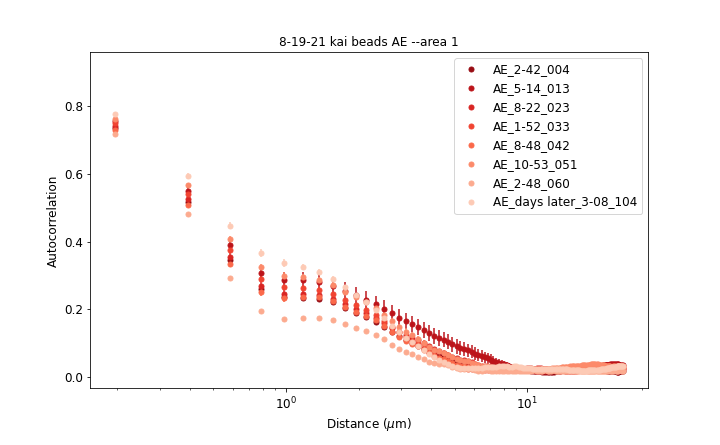

256


Text(0.5, 1.0, '8-19-21 kai beads AE --area 1')

In [37]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Reds')

fig, ax = plt.subplots(figsize=(10,10/1.618))

ax.tick_params(axis='both', which='major', labelsize=12)
markerSize = 10
y_error =  [[0.0] * 128] * len(files)
avg_corr_rad_array =  [[0.0] * 128] * len(files)
new_array = [0.0] * len(im_array1)
print(len(im_array1[0]))
#print(y_error[0][0])
for i in range(area_files_length):    
    full_filename = area1_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    corr_im_array1[i], corr_rad_array1[i] = im_corr(im_array1[i],filter=False,filtersize=50)
    corr_im_array2[i], corr_rad_array2[i] = im_corr(im_array2[i],filter=False,filtersize=50)
    corr_im_array3[i], corr_rad_array3[i] = im_corr(im_array3[i],filter=False,filtersize=50)
    xvalues = np.arange(len(corr_rad_array1[i]))*0.196 
    for j in range(len(corr_rad_array1[i])):
        avg_corr_rad_array[i][j] = (gf1d(corr_rad_array1[i],1)[j] + gf1d(corr_rad_array2[i],1)[j] + gf1d(corr_rad_array3[i],1)[j])/3
        y_error[i][j] = (np.std([gf1d(corr_rad_array1[i],1)[j], gf1d(corr_rad_array2[i],1)[j], gf1d(corr_rad_array3[i],1)[j]]))/np.sqrt(3)
    plt.semilogx(xvalues, avg_corr_rad_array[i],'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.errorbar(xvalues, avg_corr_rad_array[i], yerr = y_error[i], fmt ='none', ecolor=cmap(0.9-(i/10)))
    area1_dict['x values'] = xvalues
    area1_dict[data_file] = gf1d(corr_rad_array[i],1)
    area1_dict[data_file+'_error'] = y_error[i]

results_dict['area 1'] = area1_dict
    
plt.xlabel("Distance ($\mu$m)",fontsize=12)
plt.ylabel("Autocorrelation",fontsize=12)
plt.legend(loc=0,fontsize=12)

#plt.xlim(0.14, 20)
plt.title(exp+" "+kaiC+" --area 1")
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

In [38]:
fig.savefig(plot_saveto+"//"+kaiC+"_avg_area1_autocorrelation_frame"+str(frame_num)+".png",dpi=600)

In [53]:
fig.savefig(plot_saveto+"//"+kaiC+"_area1_autocorrelation_frame"+str(frame_num)+".png",dpi=600)
np.savetxt(plot_saveto+"//csv data sheets//"+kaiC+"_area1_autocorrelation_frame"+str(frame_num)+'.csv', 
           np.c_[xvalues, gf1d(corr_rad_array[0],1),y_error[0],
                 gf1d(corr_rad_array[1],1),y_error[1],gf1d(corr_rad_array[2],1),y_error[2],
                 gf1d(corr_rad_array[3],1),y_error[3],gf1d(corr_rad_array[4],1),y_error[4],
                 gf1d(corr_rad_array[5],1),y_error[5],gf1d(corr_rad_array[6],1),y_error[6],
                 gf1d(corr_rad_array[7],1),y_error[7]], delimiter=',')
results_dict

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 128 and the array at index 1 has size 24

In [121]:
#Load one frame from all area 2 files
#The 'key' parameter (defined by "frame_num") specifies which frame to load
frame_num = [0]
for i in range(area_files_length): #len(files)):
    full_filename = area2_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    im_array[i+area_files_length] = tiff_file.imread(data_dir+data_file+".tif",key=frame_num)

Shape of ims is 256,256


<IPython.core.display.Javascript object>


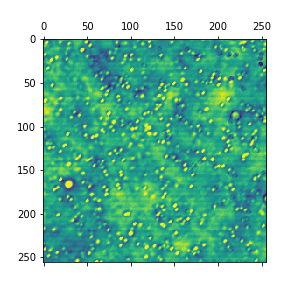

In [122]:
#preview the given frame of a selected area 2 file (defined by "select_file_num")
select_file_num = 14
print("Shape of ims is %i,%i" % im_array[select_file_num].shape)
plt.matshow(im_array[select_file_num])

<IPython.core.display.Javascript object>


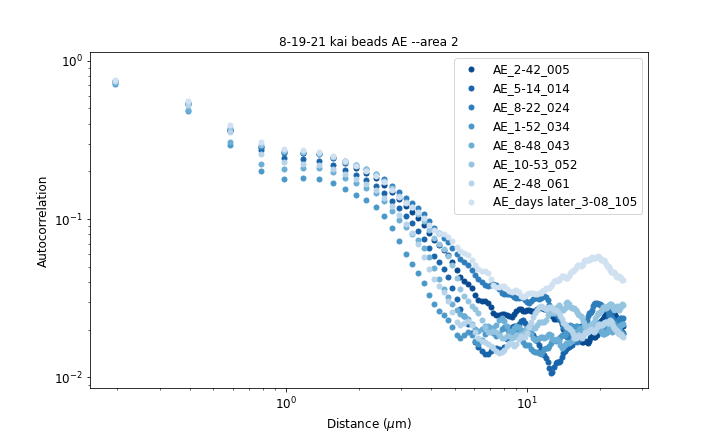

Text(0.5, 1.0, '8-19-21 kai beads AE --area 2')

In [127]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Blues')

fig, ax = plt.subplots(figsize=(10,10/1.618))
ax.tick_params(axis='both', which='major', labelsize=12)
markerSize = 10

for i in range(area_files_length):    
    full_filename = area2_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    corr_im_array[i], corr_rad_array[i] = im_corr(im_array[i+area_files_length],filter=False,filtersize=50)
    xvalues = np.arange(len(corr_rad_array[0]))*0.196  
    #plt.semilogx(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.semilogy(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.loglog(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    area2_dict['x values'] = xvalues
    area2_dict[data_file] = gf1d(corr_rad_array[i],1)

results_dict['area 2'] = area2_dict

plt.xlabel("Distance ($\mu$m)",fontsize=12)
plt.ylabel("Autocorrelation",fontsize=12)
plt.legend(loc=0,fontsize=12)

#plt.xlim(0.14, 20)
plt.title(exp+" "+data_file[:-20]+" --area 2")
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

In [91]:
fig.savefig(plot_saveto+"//"+kaiC+"_area2_autocorrelation_frame"+str(frame_num)+".png",dpi=600)
np.savetxt(plot_saveto+"//"+kaiC+"_area2_autocorrelation_frame"+str(frame_num)+'.csv', 
           np.c_[xvalues, gf1d(corr_rad_array[0],1),gf1d(corr_rad_array[1],1),gf1d(corr_rad_array[2],1),gf1d(corr_rad_array[3],1),gf1d(corr_rad_array[4],1),gf1d(corr_rad_array[5],1),gf1d(corr_rad_array[6],1),gf1d(corr_rad_array[7],1)], delimiter=',')

In [128]:
#Load one frame from all area 3 files
#The 'key' parameter (defined by "frame_num") specifies which frame to load
frame_num = [0]
for i in range(area_files_length): #len(files)):
    full_filename = area3_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    im_array[i+(area_files_length*2)] = tiff_file.imread(data_dir+data_file+".tif",key=frame_num)


Shape of ims is 256,256


<IPython.core.display.Javascript object>


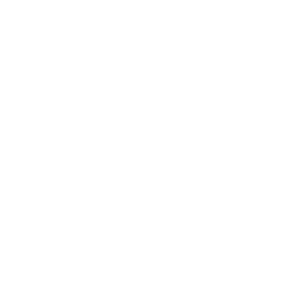

In [129]:
#preview the given frame of a selected area 3 file (defined by "select_file_num")
select_file_num = 16
print("Shape of ims is %i,%i" % im_array[select_file_num].shape)
plt.matshow(im_array[select_file_num])

<IPython.core.display.Javascript object>


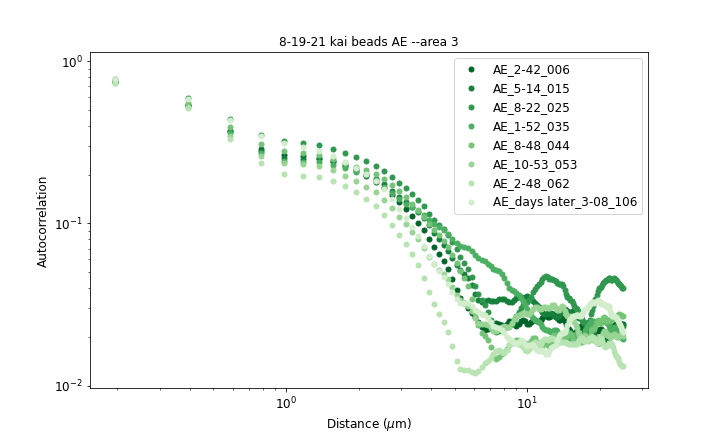

Text(0.5, 1.0, '8-19-21 kai beads AE --area 3')

In [132]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Greens')

fig, ax = plt.subplots(figsize=(10,10/1.618))
ax.tick_params(axis='both', which='major', labelsize=12)
markerSize = 10

for i in range(area_files_length):    
    full_filename = area3_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    corr_im_array[i], corr_rad_array[i] = im_corr(im_array[i+(area_files_length*2)],filter=False,filtersize=50)
    xvalues = np.arange(len(corr_rad_array[0]))*0.196 
    plt.semilogx(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.semilogy(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.loglog(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    area3_dict['x values'] = xvalues
    area3_dict[data_file] = gf1d(corr_rad_array[i],1)

results_dict['area 3'] = area3_dict

plt.xlabel("Distance ($\mu$m)",fontsize=12)
plt.ylabel("Autocorrelation",fontsize=12)
plt.legend(loc=0,fontsize=12)

#plt.xlim(0.14, 20)
plt.title(exp+" "+kaiC+" --area 3")
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

In [95]:
fig.savefig(plot_saveto+"//"+kaiC+"_area3_autocorrelation_frame"+str(frame_num)+".png",dpi=600)
np.savetxt(plot_saveto+"//"+kaiC+"_area3_autocorrelation_frame"+str(frame_num)+'.csv', 
           np.c_[xvalues, gf1d(corr_rad_array[0],1),gf1d(corr_rad_array[1],1),gf1d(corr_rad_array[2],1),gf1d(corr_rad_array[3],1),gf1d(corr_rad_array[4],1),gf1d(corr_rad_array[5],1),gf1d(corr_rad_array[6],1),gf1d(corr_rad_array[7],1)], delimiter=',')

In [96]:
file_to_write = open(plot_saveto+"//"+kaiC + "_SIA_results.p", "wb")
pickle.dump(results_dict, file_to_write)

In [75]:
#pickle.load(open(plot_saveto+"//"+kaiC + "_SIA_results.p",'rb')) 